Epoch 1/10
782/782 [==============================] - 12s 15ms/step - loss: 2.1190 - accuracy: 0.2202 - val_loss: 1.9649 - val_accuracy: 0.2906
Epoch 2/10
782/782 [==============================] - 11s 15ms/step - loss: 1.8730 - accuracy: 0.3296 - val_loss: 1.7745 - val_accuracy: 0.3799
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 1.6755 - accuracy: 0.4041 - val_loss: 1.6110 - val_accuracy: 0.4093
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 1.5351 - accuracy: 0.4510 - val_loss: 1.4850 - val_accuracy: 0.4681
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 1.4438 - accuracy: 0.4837 - val_loss: 1.6685 - val_accuracy: 0.4091
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 1.3739 - accuracy: 0.5109 - val_loss: 1.3633 - val_accuracy: 0.5148
Epoch 7/10
782/782 [==============================] - 12s 16ms/step - loss: 1.3163 - accuracy: 0.5350 - val_loss: 1.3144 - val_accuracy:

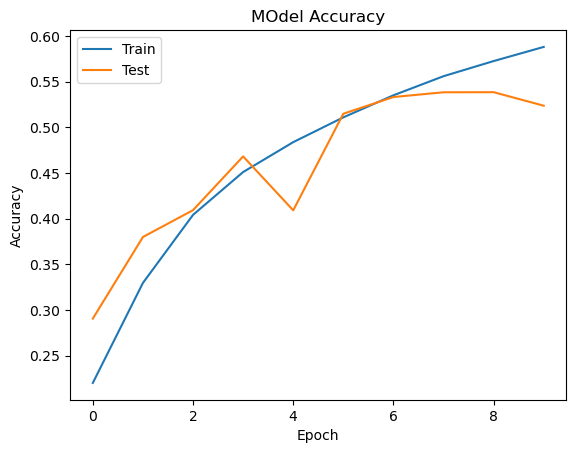

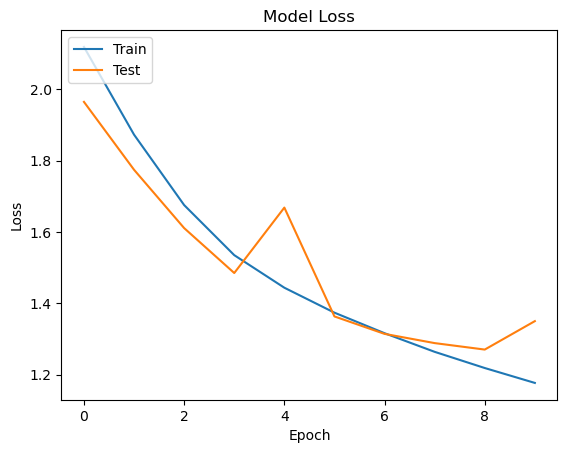

157/157 [==============================] - 1s 6ms/step - loss: 1.3501 - accuracy: 0.5236
test accuracy : 0.5235999822616577


In [1]:

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# //loading dataset//

(train_dataset,test_dataset), info = tfds.load('cifar10',split=['train','test'],with_info=True,as_supervised=True)

# Defining input shape

input_shape=info.features['image'].shape
num_classes=info.features['label'].num_classes

# Preprocessing dataset

train_dataset=train_dataset.map(lambda x,y: (tf.cast(x,tf.float32)/255.0,y)).shuffle(1000).batch(64)
test_dataset=test_dataset.map(lambda x,y : (tf.cast(x,tf.float32)/255.0,y)).batch(64)

#building NN model

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history=model.fit(train_dataset,epochs=10,validation_data=test_dataset)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("MOdel Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Test'],loc="upper left")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Test'],loc="upper left")
plt.show()

test_loss, test_acc=model.evaluate(test_dataset)
print('test accuracy :',test_acc)
